# Attainment of Bachelor's Degree or Higher, 2011 and 2016

### Step 1: Import libraries, Import data, Get a clean dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in (2011) Table B40A: Non-School Qualification: Level of Education by Age by Sex
edu_b40a = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B40A_NSW_SA2_short.csv')

#read in (2011) Table B40B: Non-School Qualification: Level of Education by Age by Sex
edu_b40b = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B40B_NSW_SA2_short.csv')

#read in (2016) Table G46A: Non-School Qualification: Level of Education by Age by Sex
edu_g46a = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G46A_NSW_SA2.csv')

#read in G46B Table: Non-School Qualification: Level of Education by Age by Sex
edu_g46b = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G46B_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning 2011 Tables B40A and B40B

In [3]:
#find the total column for each edu level (not broken down m/f)
## tot_cols = [col for col in edu_b40a.columns if 'P_' in col]
## print(list(edu_b40a.columns))
## print(tot_cols)

In [4]:
#keep only the total column for each edu level (not broken down m/f)

edu_b40a = edu_b40a[['region_id', 'P_PGrad_Deg_15_24', 'P_PGrad_Deg_25_34']]
edu_b40a.head()

,region_id,P_PGrad_Deg_15_24,P_PGrad_Deg_25_34
0,101011001,3,21
1,101011002,3,13
2,101011003,0,13
3,101011004,3,30
4,101011005,0,9


In [5]:
#merge B40A and B40B into new dataframe: edu_11

edu_b40 = pd.merge(edu_b40a,edu_b40b,on='region_id',how="left").copy()
edu_b40.head()

,region_id,P_PGrad_Deg_15_24,P_PGrad_Deg_25_34,P_PGrad_Deg_35_44,P_PGrad_Deg_45_54,P_PGrad_Deg_55_64,P_PGrad_Deg_65_74,P_PGrad_Deg_75_84,P_PGrad_Deg_85ov,P_PGrad_Deg_Total,P_GradDip_and_GradCert_15_24,P_GradDip_and_GradCert_25_34,P_GradDip_and_GradCert_35_44,P_GradDip_and_GradCert_45_54,P_GradDip_and_GradCert_55_64,P_GradDip_and_GradCert_65_74,P_GradDip_and_GradCert_75_84,P_GradDip_and_GradCert_85ov,P_GradDip_and_GradCert_Total,P_BachDeg_15_24,P_BachDeg_25_34,P_BachDeg_35_44,P_BachDeg_45_54,P_BachDeg_55_64,P_BachDeg_65_74,P_BachDeg_75_84,P_BachDeg_85ov,P_BachDeg_Total,P_AdvDip_and_Dip_15_24,P_AdvDip_and_Dip_25_34,P_AdvDip_and_Dip_35_44,P_AdvDip_and_Dip_45_54,P_AdvDip_and_Dip_55_64,P_AdvDip_and_Dip_65_74,P_AdvDip_and_Dip_75_84,P_AdvDip_and_Dip_85ov,P_AdvDip_and_Dip_Total,P_Cert_Levl_nfd_15_24,P_Cert_Levl_nfd_25_34,P_Cert_Levl_nfd_35_44,P_Cert_Levl_nfd_45_54,P_Cert_Levl_nfd_55_64,P_Cert_Levl_nfd_65_74,P_Cert_Levl_nfd_75_84,P_Cert_Levl_nfd_85ov,P_Cert_Levl_nfd_Total,P_Cert_III_IV_15_24,P_Cert_III_IV_25_34,P_Cert_III_IV_35_44,P_Cert_III_IV_45_54,P_Cert_III_IV_55_64,P_Cert_III_IV_65_74,P_Cert_III_IV_75_84,P_Cert_III_IV_85ov,P_Cert_III_IV_Total,P_Cert_I_II_15_24,P_Cert_I_II_25_34,P_Cert_I_II_35_44,P_Cert_I_II_45_54,P_Cert_I_II_55_64,P_Cert_I_II_65_74,P_Cert_I_II_75_84,P_Cert_I_II_85ov,P_Cert_I_II_Total,P_Cert_Lev_Tot_15_24,P_Cert_Lev_Tot_25_34,P_Cert_Lev_Tot_35_44,P_Cert_Lev_Tot_45_54,P_Cert_Lev_Tot_55_64,P_Cert_Lev_Tot_65_74,P_Cert_Lev_Tot_75_84,P_Cert_Lev_Tot_85ov,P_Cert_Lev_Tot_Total,P_Lev_Edu_IDes_15_24,P_Lev_Edu_IDes_25_34,P_Lev_Edu_IDes_35_44,P_Lev_Edu_IDes_45_54,P_Lev_Edu_IDes_55_64,P_Lev_Edu_IDes_65_74,P_Lev_Edu_IDes_75_84,P_Lev_Edu_IDes_85ov,P_Lev_Edu_IDes_Total,P_Lev_Edu_NS_15_24,P_Lev_Edu_NS_25_34,P_Lev_Edu_NS_35_44,P_Lev_Edu_NS_45_54,P_Lev_Edu_NS_55_64,P_Lev_Edu_NS_65_74,P_Lev_Edu_NS_75_84,P_Lev_Edu_NS_85ov,P_Lev_Edu_NS_Total,P_Tot_15_24,P_Tot_25_34,P_Tot_35_44,P_Tot_45_54,P_Tot_55_64,P_Tot_65_74,P_Tot_75_84,P_Tot_85ov,P_Tot_Total
0,101011001,3,21,44,63,62,20,3,0,216,5,27,27,55,45,18,4,0,181,56,247,245,229,209,129,56,21,1192,60,188,250,245,234,107,51,15,1150,40,43,59,86,69,25,7,9,338,353,633,679,608,454,260,131,38,3156,65,72,64,48,23,11,6,0,289,458,748,802,742,546,296,144,47,3783,13,26,34,51,50,30,21,10,235,267,336,319,299,291,282,300,137,2231,862,1593,1721,1684,1437,882,579,230,8988
1,101011002,3,13,28,35,65,34,6,3,187,3,11,24,32,41,17,3,0,131,12,107,179,176,170,100,28,6,778,16,53,143,178,171,113,24,8,706,11,20,47,44,53,24,11,0,210,169,249,381,405,356,181,73,14,1828,20,17,37,40,23,12,6,0,155,200,286,465,489,432,217,90,14,2193,6,8,26,34,39,29,9,3,154,126,68,98,150,151,189,135,30,947,366,546,963,1094,1069,699,295,64,5096
2,101011003,0,13,32,17,30,15,3,0,110,3,8,17,20,19,8,3,0,78,21,116,141,89,93,42,6,3,511,21,67,99,64,57,36,15,4,363,3,10,22,18,21,12,6,4,96,110,139,207,188,104,69,40,6,863,8,11,17,14,13,0,0,0,63,121,160,246,220,138,81,46,10,1022,6,8,11,8,15,3,10,3,64,69,52,71,69,56,70,113,94,594,241,424,617,487,408,255,196,114,2742
3,101011004,3,30,111,127,115,57,14,0,457,5,19,67,71,82,28,0,0,272,16,152,353,310,261,119,32,3,1246,17,91,184,178,157,100,20,8,755,3,10,37,31,30,18,8,0,137,94,212,354,310,199,113,23,4,1309,15,26,20,14,11,7,0,0,93,112,248,411,355,240,138,31,4,1539,3,10,19,39,28,15,3,0,117,90,57,89,111,98,85,54,12,596,246,607,1234,1191,981,542,154,27,4982
4,101011005,0,9,21,13,13,8,6,0,70,0,10,19,16,22,6,3,0,76,26,137,138,88,82,40,14,9,534,16,63,111,71,92,42,23,7,425,8,17,24,29,26,11,0,0,115,167,261,328,295,237,135,40,13,1476,23,28,22,16,12,9,3,0,113,198,306,374,340,275,155,43,13,1704,3,8,19,27,22,17,3,3,102,132,88,94,103,146,135,138,68,904,375,621,776,658,652,403,230,100,3815


In [6]:
#rename "region_id" to "SA2_MAINCODE_2011" for SA2 ID to match 2016 and corr format
edu_b40.rename(columns={'region_id':'SA2_MAINCODE_2011'}, inplace=True)

In [7]:
#sum people age 25+ who earned a Bachelors, Grad, Postgrad

edu_b40['bach_25ov_11'] = edu_b40['P_BachDeg_25_34'] + edu_b40['P_BachDeg_35_44'] + edu_b40['P_BachDeg_45_54'] + edu_b40['P_BachDeg_55_64'] + edu_b40['P_BachDeg_65_74'] + edu_b40['P_BachDeg_75_84'] + edu_b40['P_BachDeg_85ov']
edu_b40['grad_25ov_11'] = edu_b40['P_GradDip_and_GradCert_25_34'] + edu_b40['P_GradDip_and_GradCert_35_44'] + edu_b40['P_GradDip_and_GradCert_45_54'] + edu_b40['P_GradDip_and_GradCert_55_64'] + edu_b40['P_GradDip_and_GradCert_65_74'] + edu_b40['P_GradDip_and_GradCert_75_84'] + edu_b40['P_GradDip_and_GradCert_85ov']
edu_b40['pgrad_25ov_11'] = edu_b40['P_PGrad_Deg_25_34'] + edu_b40['P_PGrad_Deg_35_44'] + edu_b40['P_PGrad_Deg_45_54'] + edu_b40['P_PGrad_Deg_55_64'] + edu_b40['P_PGrad_Deg_65_74'] + edu_b40['P_PGrad_Deg_75_84'] + edu_b40['P_PGrad_Deg_85ov']

In [8]:
#sum people age 25+ who earned a Bachelors degree or higher
edu_b40['bachplus_25ov_11'] = edu_b40['bach_25ov_11'] + edu_b40['grad_25ov_11'] + edu_b40['pgrad_25ov_11']

#sum the denominator of people age 25+
edu_b40['pop_25ov_11'] = edu_b40['P_Tot_25_34'] + edu_b40['P_Tot_35_44'] + edu_b40['P_Tot_45_54'] + edu_b40['P_Tot_55_64'] + edu_b40['P_Tot_65_74'] + edu_b40['P_Tot_75_84'] + edu_b40['P_Tot_85ov']

In [9]:
## print(list(edu_b40.columns))

In [10]:
#restrict data frame to only the essentials

edu11 = edu_b40[['SA2_MAINCODE_2011', 'bachplus_25ov_11', 'pop_25ov_11']].copy()

### Correspondence: Fitting 2011 Data to 2016 Geographies

In [11]:
#merge many:many, joining income B40 table (NSW) to the correspondence table (all of Australia)

edu_2011 = pd.merge(edu11,corr,on='SA2_MAINCODE_2011',how='right')
edu_2011.head()

,SA2_MAINCODE_2011,bachplus_25ov_11,pop_25ov_11,SA2_NAME_2011,SA2_MAINCODE_2016,SA2_NAME_2016,RATIO,PERCENTAGE
0,101011001,1525.0,8126.0,Goulburn,101051539,Goulburn,1.0,100.0
1,101011002,1078.0,4730.0,Goulburn Region,101051540,Goulburn Region,1.0,100.0
2,101011003,675.0,2501.0,Yass,101061541,Yass,1.0,100.0
3,101011004,1951.0,4736.0,Yass Region,101061542,Yass Region,1.0,100.0
4,101011005,654.0,3440.0,Young,101061543,Young,1.0,100.0


In [12]:
#apply correspondence ration to 2011 data to fit to 2016 SA2 areas
edu_2011['bachplus_25ov_11_sa2'] = edu_2011['bachplus_25ov_11'] * edu_2011['RATIO']
edu_2011['pop_25ov_11_sa2'] = edu_2011['pop_25ov_11'] * edu_2011['RATIO']

In [13]:
#pull csv and pivot in Excel
edu_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\edu_2011.csv')

In [14]:
#read back in pivoted data

edu_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\edu_2011_sa2.csv')

### Cleaning 2016 Tables G46A and G46B

In [15]:
#find the total column for each edu level (not broken down m/f)
## tot_cols = [col for col in edu_g46a.columns if 'P_' in col]
## print(list(edu_g46a.columns))
## print(tot_cols)

In [16]:
#keep only the total column for each edu level (not broken down m/f)

edu_g46a = edu_g46a[['SA2_MAINCODE_2016', 'P_PGrad_Deg_15_24', 'P_PGrad_Deg_25_34']]
edu_g46a.head()

,SA2_MAINCODE_2016,P_PGrad_Deg_15_24,P_PGrad_Deg_25_34
0,101021007,0,16
1,101021008,0,34
2,101021009,4,168
3,101021010,3,104
4,101021011,3,65


In [17]:
#merge G46A and G46B into new dataframe: edu_g46

edu_g46 = pd.merge(edu_g46a,edu_g46b,on='SA2_MAINCODE_2016',how="left").copy()
edu_g46.head()

,SA2_MAINCODE_2016,P_PGrad_Deg_15_24,P_PGrad_Deg_25_34,P_PGrad_Deg_35_44,P_PGrad_Deg_45_54,P_PGrad_Deg_55_64,P_PGrad_Deg_65_74,P_PGrad_Deg_75_84,P_PGrad_Deg_85ov,P_PGrad_Deg_Total,P_GradDip_and_GradCert_15_24,P_GradDip_and_GradCert_25_34,P_GradDip_and_GradCert_35_44,P_GradDip_and_GradCert_45_54,P_GradDip_and_GradCert_55_64,P_GradDip_and_GradCert_65_74,P_GradDip_and_GradCert_75_84,P_GradDip_and_GradCert_85ov,P_GradDip_and_GradCert_Total,P_BachDeg_15_24,P_BachDeg_25_34,P_BachDeg_35_44,P_BachDeg_45_54,P_BachDeg_55_64,P_BachDeg_65_74,P_BachDeg_75_84,P_BachDeg_85ov,P_BachDeg_Total,P_AdvDip_and_Dip_15_24,P_AdvDip_and_Dip_25_34,P_AdvDip_and_Dip_35_44,P_AdvDip_and_Dip_45_54,P_AdvDip_and_Dip_55_64,P_AdvDip_and_Dip_65_74,P_AdvDip_and_Dip_75_84,P_AdvDip_and_Dip_85ov,P_AdvDip_and_Dip_Total,P_Cert_III_IV_15_24,P_Cert_III_IV_25_34,P_Cert_III_IV_35_44,P_Cert_III_IV_45_54,P_Cert_III_IV_55_64,P_Cert_III_IV_65_74,P_Cert_III_IV_75_84,P_Cert_III_IV_85ov,P_Cert_III_IV_Total,P_Cert_I_II_15_24,P_Cert_I_II_25_34,P_Cert_I_II_35_44,P_Cert_I_II_45_54,P_Cert_I_II_55_64,P_Cert_I_II_65_74,P_Cert_I_II_75_84,P_Cert_I_II_85ov,P_Cert_I_II_Total,P_Cert_Levl_nfd_15_24,P_Cert_Levl_nfd_25_34,P_Cert_Levl_nfd_35_44,P_Cert_Levl_nfd_45_54,P_Cert_Levl_nfd_55_64,P_Cert_Levl_nfd_65_74,P_Cert_Levl_nfd_75_84,P_Cert_Levl_nfd_85ov,P_Cert_Levl_nfd_Total,P_Cert_Lev_Tot_15_24,P_Cert_Lev_Tot_25_34,P_Cert_Lev_Tot_35_44,P_Cert_Lev_Tot_45_54,P_Cert_Lev_Tot_55_64,P_Cert_Lev_Tot_65_74,P_Cert_Lev_Tot_75_84,P_Cert_Lev_Tot_85ov,P_Cert_Lev_Tot_Total,P_Lev_Edu_IDes_15_24,P_Lev_Edu_IDes_25_34,P_Lev_Edu_IDes_35_44,P_Lev_Edu_IDes_45_54,P_Lev_Edu_IDes_55_64,P_Lev_Edu_IDes_65_74,P_Lev_Edu_IDes_75_84,P_Lev_Edu_IDes_85ov,P_Lev_Edu_IDes_Total,P_Lev_Edu_NS_15_24,P_Lev_Edu_NS_25_34,P_Lev_Edu_NS_35_44,P_Lev_Edu_NS_45_54,P_Lev_Edu_NS_55_64,P_Lev_Edu_NS_65_74,P_Lev_Edu_NS_75_84,P_Lev_Edu_NS_85ov,P_Lev_Edu_NS_Total,P_Tot_15_24,P_Tot_25_34,P_Tot_35_44,P_Tot_45_54,P_Tot_55_64,P_Tot_65_74,P_Tot_75_84,P_Tot_85ov,P_Tot_Total
0,101021007,0,16,13,35,51,41,15,0,170,0,5,9,15,20,18,6,0,77,9,36,98,82,97,70,30,0,413,3,24,39,66,72,48,20,3,274,36,66,96,114,132,81,26,8,558,8,4,5,11,7,8,0,0,38,4,6,6,23,16,27,4,0,93,42,78,109,150,155,115,34,15,685,0,5,4,3,9,5,0,0,29,55,42,65,80,93,111,47,22,507,111,202,333,429,491,400,151,37,2155
1,101021008,0,34,49,49,46,14,0,0,197,0,20,35,39,26,7,0,0,127,43,154,131,111,87,40,20,3,584,32,107,129,137,84,45,12,0,553,147,271,263,249,202,82,27,4,1254,19,20,15,6,18,4,0,0,85,6,17,17,34,37,17,10,0,138,174,304,293,294,257,110,38,4,1478,0,7,3,6,5,6,4,3,37,92,76,90,92,78,76,56,12,573,336,704,733,723,588,299,128,30,3543
2,101021009,4,168,141,82,46,12,6,0,464,4,61,45,61,27,9,3,0,215,82,490,314,164,121,66,24,10,1281,49,250,152,162,103,60,18,13,805,171,396,299,256,184,108,48,22,1483,40,33,11,15,14,6,0,0,121,3,21,34,36,29,22,12,8,170,216,445,342,310,226,138,62,35,1774,4,19,12,10,13,8,7,4,68,102,235,122,110,100,125,88,63,949,457,1677,1129,913,636,417,215,125,5563
3,101021010,3,104,54,61,38,27,8,0,284,0,15,20,25,15,11,3,0,89,45,229,118,94,84,60,11,0,645,27,104,78,86,54,23,3,3,384,80,170,126,119,88,34,15,9,643,16,12,13,9,5,8,0,0,65,4,10,5,17,10,12,3,0,60,102,192,146,134,106,46,21,8,765,0,4,0,11,5,0,0,0,20,20,73,54,55,41,22,32,6,311,213,714,480,466,344,193,77,16,2498
4,101021011,3,65,197,299,202,121,27,3,921,3,46,96,116,128,67,8,0,470,77,361,506,497,379,195,55,6,2081,62,202,332,399,299,131,43,3,1464,182,455,460,514,400,186,52,12,2261,38,30,13,26,21,16,0,0,146,11,21,46,68,64,37,14,3,262,228,504,521,612,481,244,71,14,2671,4,7,19,22,18,10,4,0,85,252,173,244,313,299,196,70,19,1560,630,1363,1914,2252,1796,965,274,45,9241


In [18]:
#sum people age 25+ who earned a Bachelors, Grad, Postgrad
edu_g46['bach_25ov_16'] = edu_g46['P_BachDeg_25_34'] + edu_g46['P_BachDeg_35_44'] + edu_g46['P_BachDeg_45_54'] + edu_g46['P_BachDeg_55_64'] + edu_g46['P_BachDeg_65_74'] + edu_g46['P_BachDeg_75_84'] + edu_g46['P_BachDeg_85ov']
edu_g46['grad_25ov_16'] = edu_g46['P_GradDip_and_GradCert_25_34'] + edu_g46['P_GradDip_and_GradCert_35_44'] + edu_g46['P_GradDip_and_GradCert_45_54'] + edu_g46['P_GradDip_and_GradCert_55_64'] + edu_g46['P_GradDip_and_GradCert_65_74'] + edu_g46['P_GradDip_and_GradCert_75_84'] + edu_g46['P_GradDip_and_GradCert_85ov']
edu_g46['pgrad_25ov_16'] = edu_g46['P_PGrad_Deg_25_34'] + edu_g46['P_PGrad_Deg_35_44'] + edu_g46['P_PGrad_Deg_45_54'] + edu_g46['P_PGrad_Deg_55_64'] + edu_g46['P_PGrad_Deg_65_74'] + edu_g46['P_PGrad_Deg_75_84'] + edu_g46['P_PGrad_Deg_85ov']

In [19]:
#sum people age 25+ who earned a Bachelors degree or higher
edu_g46['bachplus_25ov_16'] = edu_g46['bach_25ov_16'] + edu_g46['grad_25ov_16'] + edu_g46['pgrad_25ov_16']

#sum the denominator of people age 25+
edu_g46['pop_25ov_16'] = edu_g46['P_Tot_25_34'] + edu_g46['P_Tot_35_44'] + edu_g46['P_Tot_45_54'] + edu_g46['P_Tot_55_64'] + edu_g46['P_Tot_65_74'] + edu_g46['P_Tot_75_84'] + edu_g46['P_Tot_85ov']

In [20]:
## print(list(edu_g46.columns))

In [21]:
#restrict data frame to only the essentials

edu_2016 = edu_g46[['SA2_MAINCODE_2016', 'bachplus_25ov_16', 'pop_25ov_16']].copy()

### Merge 2011 and 2016 Tables

In [22]:
#merge 2011 and 2016 tables
education = pd.merge(edu_2011_sa2,edu_2016,on='SA2_MAINCODE_2016',how="right")
education

,SA2_MAINCODE_2016,bachplus_25ov_11_sa2,pop_25ov_11_sa2,bachplus_25ov_16,pop_25ov_16
0,101021007,524.000000,1541.000000,657,2043
1,101021008,808.000000,3113.000000,865,3205
2,101021009,1514.000000,4420.000000,1850,5112
3,101021010,812.000000,2115.000000,977,2290
4,101021011,2765.000000,6588.000000,3374,8609
...,...,...,...,...,...
573,128021607,2044.278065,7262.203210,2313,7803
574,128021608,884.217824,3141.142897,1236,3415
575,128021609,474.504111,1685.653893,624,1723
576,197979799,NaN,NaN,33,200


### Merge SA2 shapes for UCL area

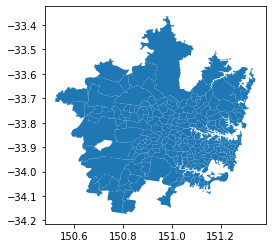

In [23]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [24]:
#merge 2011 and 2016 income data with UCL SA2 data
edu_11_16 = pd.merge(syd_ucl, education, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
edu_11_16.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,bachplus_25ov_11_sa2,pop_25ov_11_sa2,bachplus_25ov_16,pop_25ov_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,4645.000000,10208.000000,6022,11635
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,3971.000000,8359.000000,5369,9900
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,1146.999771,2674.999465,1388,3130
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,3525.000000,6154.000000,4125,6664
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,1696.669497,3495.785364,2149,3928


### Calculate Percents and Percent Change, 2011 to 2016

In [25]:
#calculate % residents 25+ with a bachelors degree or higher

edu_11_16['bachplus_11_pct'] = edu_11_16['bachplus_25ov_11_sa2']/edu_11_16['pop_25ov_11_sa2']
edu_11_16['bachplus_16_pct'] = edu_11_16['bachplus_25ov_16']/edu_11_16['pop_25ov_16']

In [26]:
#determine what % of people 25+ in median SA2 has Bach or higher in 2011 (answer: 39.5950%)

edu_11_16['bachplus_11_pct'].describe(percentiles=[.2,.4,.6,.8])

count    262.000000
mean       0.403141
std        0.152718
min        0.000000
20%        0.266570
40%        0.342739
50%        0.395950
60%        0.448242
80%        0.552338
max        1.000000
Name: bachplus_11_pct, dtype: float64

In [27]:
#dummy variable for SA2s where % people w Bach+ < regional median (39.5950%) 2011

edu_11_16['bachplus_11_pct_ovregmed'] = np.where(edu_11_16['bachplus_11_pct'] < 0.395950, 1, 0)

In [28]:
#determine what % of people 25+ in median SA2 has Bach or higher in 2016 (answer: 44.4075%)

edu_11_16['bachplus_16_pct'].describe()

count    261.000000
mean       0.442512
std        0.151588
min        0.000000
25%        0.337833
50%        0.444075
75%        0.573455
max        0.708386
Name: bachplus_16_pct, dtype: float64

In [29]:
#dummy variable for SA2s where % people w Bach+ < regional median (44.4075%) 2016

edu_11_16['bachplus_16_pct_ovregmed'] = np.where(edu_11_16['bachplus_16_pct'] < 0.444075, 1, 0)

In [30]:
#calculate difference in percent
#subtract: [2016 % of people Age 25+ with Bach+] minus [2011 % of people Age 25+ with Bach+]

edu_11_16['pdiff_bachplus'] =  (edu_11_16['bachplus_16_pct']) - (edu_11_16['bachplus_11_pct'])

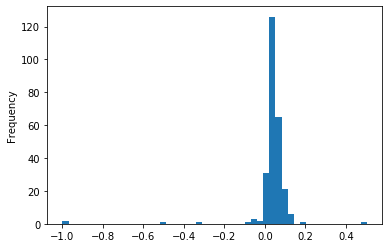

In [31]:
edu_11_16['pdiff_bachplus'].plot.hist(bins=50)

In [32]:
#calculate percent change
#divide: [percent difference] / [2011 %]

edu_11_16['pchg_pct_bachplus'] = (edu_11_16['pdiff_bachplus'])/(edu_11_16['bachplus_11_pct'])

In [33]:
#determine what % change in people 25+ has Bach+ in median SA2 (answer: 11.6197%)

edu_11_16['pchg_pct_bachplus'].describe(percentiles=[.2,.4,.6,.8])

count    261.000000
mean            inf
std             NaN
min       -1.000000
20%        0.061905
40%        0.102267
50%        0.116197
60%        0.138109
80%        0.190571
max             inf
Name: pchg_pct_bachplus, dtype: float64

In [35]:
#dummy variable for SA2s where % change in SA2 share people age25+ with Bach+ > regional median (11.6197%)

edu_11_16['pchg_pct_bachplus_ovregmed'] = np.where(edu_11_16["pchg_pct_bachplus"] > 0.116197, 1, 0)

### Export to CSV

In [36]:
edu_11_16['college_pct_11'] = edu_11_16['bachplus_11_pct']
edu_11_16['college_pct_16'] = edu_11_16['bachplus_16_pct']
edu_11_16['college_pchg_11_16'] = edu_11_16['pchg_pct_bachplus']
edu_11_16['college_pchg_ovregmed_11_16'] = edu_11_16['pchg_pct_bachplus_ovregmed']

In [37]:
output_csv = edu_11_16[['SA2_MAINCODE_2016','college_pct_11','college_pct_16','college_pchg_11_16','college_pchg_ovregmed_11_16']]
output_csv.to_csv('bachelors.csv')

### Map Bachelors Education+ Distribution in 2011, 2016, and Change 2011-2016

In [38]:
edu_map = edu_11_16
edu_map.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,bachplus_25ov_11_sa2,pop_25ov_11_sa2,bachplus_25ov_16,pop_25ov_16,bachplus_11_pct,bachplus_16_pct,bachplus_11_pct_ovregmed,bachplus_16_pct_ovregmed,pdiff_bachplus,pchg_pct_bachplus,pchg_pct_bachplus_ovregmed,college_pct_11,college_pct_16,college_pchg_11_16,college_pchg_ovregmed_11_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,4645.000000,10208.000000,6022,11635,0.455035,0.517576,0,0,0.062541,0.137442,1,0.455035,0.517576,0.137442,1
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,3971.000000,8359.000000,5369,9900,0.475057,0.542323,0,0,0.067266,0.141597,1,0.475057,0.542323,0.141597,1
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,1146.999771,2674.999465,1388,3130,0.428785,0.443450,0,1,0.014665,0.034202,0,0.428785,0.443450,0.034202,0
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,3525.000000,6154.000000,4125,6664,0.572798,0.618998,0,0,0.046199,0.080656,0,0.572798,0.618998,0.080656,0
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,1696.669497,3495.785364,2149,3928,0.485347,0.547098,0,0,0.061751,0.127230,1,0.485347,0.547098,0.127230,1


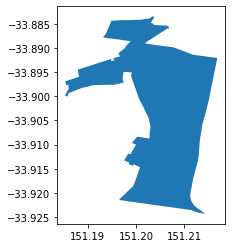

In [39]:
# let's isolate the sa2s that make up Redfern/Waterloo
red_wat_gdf = edu_map[(edu_map.SA2_MAIN16==117031335)
                          |(edu_map.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

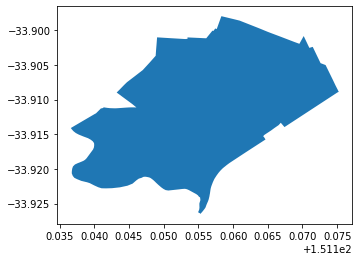

In [40]:
# let's isolate the sa2s that make up Marrickville
marr_gdf = edu_map[(edu_map.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="bachplus_11_pct", scheme='user_defined', classification_kwds={'bins':[0,0.2, 0.3, 0.4, 0.5,0.99,1]}, legend=True, ax=ax, cmap="YlGnBu")
ax.set_title("Percent of People Age 25+ with a Bachelor's Degree or Higher, Greater Sydney, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="bachplus_11_pct", scheme='user_defined', classification_kwds={'bins':[0.2, 0.4, 0.6]}, legend=True, ax=ax, cmap="GnBu")
ax.set_title("Percent of People Age 25+ with a Bachelor's Degree or Higher, 2011", fontdict={'fontsize':15})

#maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "magenta", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="bachplus_16_pct", scheme='user_defined', classification_kwds={'bins':[0,0.2, 0.3, 0.4, 0.5,0.99,1]}, legend=True, ax=ax, cmap="YlGnBu")
ax.set_title("Percent of People Age 25+ with a Bachelor's Degree or Higher, Greater Sydney, 2016", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="pchg_pct_bachplus", scheme='user_defined', classification_kwds={'bins':[-0.15,-0.05,0,0.05,0.1,0.15,0.2]}, legend=True, ax=ax, cmap="RdYlBu")
ax.set_title("Percent Change in Percent of People Age 25+ with a Bachelor's Degree or Higher, Greater Sydney, 2011 to 2016", fontdict={'fontsize':15})

#maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "magenta", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="bachplus_11_pct_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Share with a Bachelor's Degree or Higher > Regional Median (39.4%), 2011", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = edu_map.plot(column="pchg_pct_bachplus_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Areas Where Education Increases Were Greater than the Regional Median (+11.5%), 2011 to 2016", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "pink", linewidth = 1.5)

In [ ]:
#values for Redfern/Waterloo and Marrickville

edu_map.loc[(edu_map.SA2_MAIN16==117031335)
            |(edu_map.SA2_MAIN16==117031338)
            |(edu_map.SA2_MAIN16==117021326) ]

In [ ]:
edu_map['red_wat_dv'] = np.where((edu_map.SA2_MAINCODE_2016==117031335)
                                      |(edu_map.SA2_MAINCODE_2016==117031338),1,0)

edu_map['marrick_dv'] = np.where((edu_map.SA2_MAINCODE_2016==117021326),1,0)

edu_map['bach_11_dv'] = edu_map['bachplus_11_pct_ovregmed']

edu_map['bach_11_16_dv'] = edu_map['pchg_pct_bachplus_ovregmed']